# About Dataset

This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

* Age: The insured person's age.



* Sex: Gender (male or female) of the insured.

* BMI (Body Mass Index): A measure of body fat based on height and weight.

* Children: The number of dependents covered.

* Smoker: Whether the insured is a smoker (yes or no).

* Region: The geographic area of coverage.

* Charges: The medical insurance costs incurred by the insured person.

# Steps in ML Project
- problem understanding
- data collection
- data understanding
- preprocessing
- Eda
- Modeling
- Evalution
- Deployment

## Import needed libraries

In [321]:
import warnings
warnings.filterwarnings('ignore')

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load Data

In [323]:
df = pd.read_csv('/content/insurance.csv')

## Data Exploration

In [324]:
df.head()
# From the target i see this is a regression problem

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [325]:
# Is converting bmi from float to int will affect the prediction ?
type(df.bmi[0])

numpy.float64

In [326]:
# see data types of the columns
df.info()
# no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [327]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [328]:
# check duplicates
df.duplicated().sum()
# only one duplicate -> no matter

np.int64(1)

In [329]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [330]:
df.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


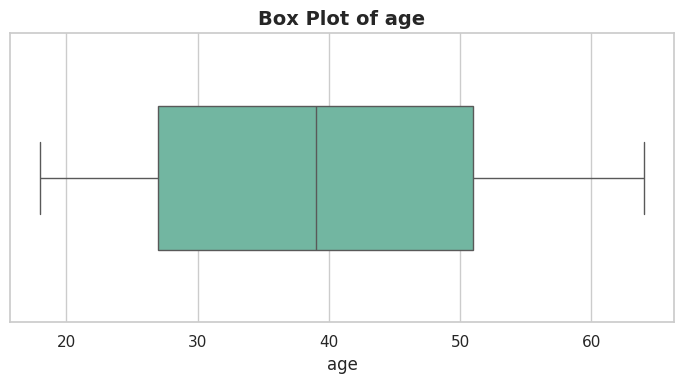

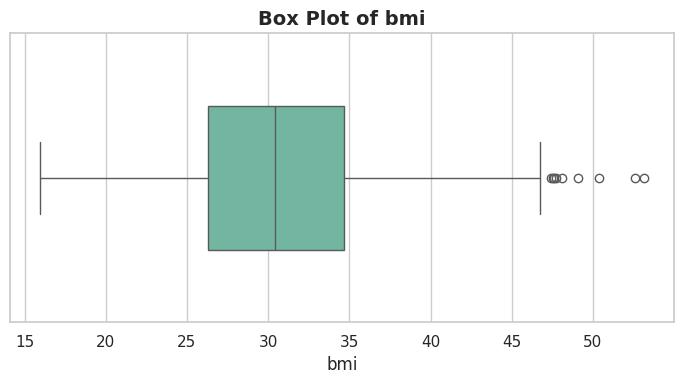

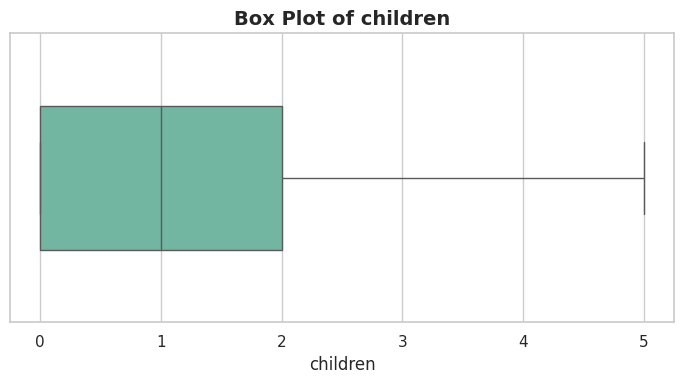

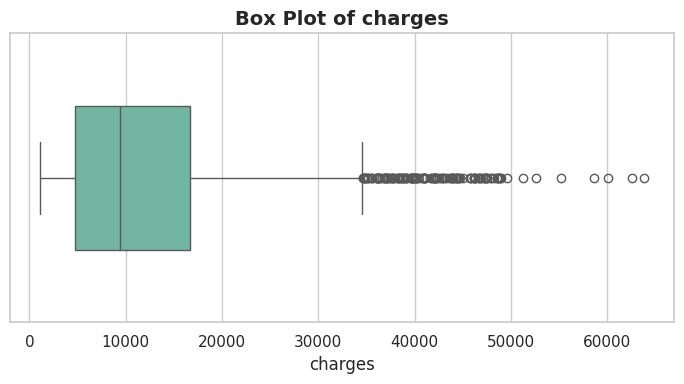

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply a beautiful Seaborn theme
sns.set(style="whitegrid")

# Select only numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Plot boxplots for each numerical column to detect outliers
for col in numeric_columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x=col, palette="Set2", width=0.5)
    plt.title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show();


<Axes: xlabel='charges', ylabel='Density'>

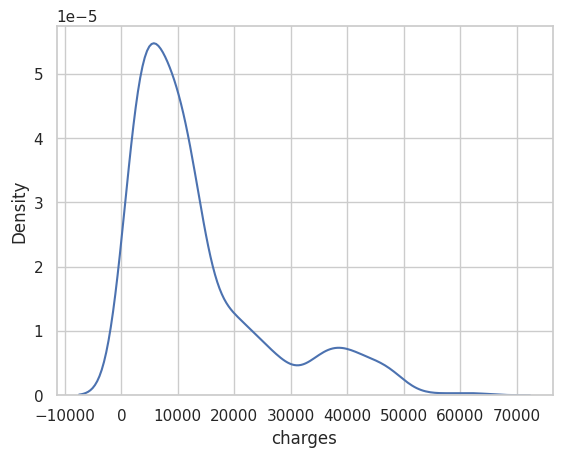

In [332]:
# Charges is Skewed
sns.kdeplot(df.charges) #right skewed


#### Right Skewed Charges problem
- Right skewed = Most values are low, few are very high



In [333]:
# How to solve the outliers in BMI ?
# calculate outlier percentage
IQR = df.bmi.quantile(0.75) - df.bmi.quantile(0.25)
U = df.bmi.quantile(0.75)+ 1.5*IQR
L = df.bmi.quantile(0.25)- 1.5*IQR
bmi_outliers = df[(df.bmi > U) | (df.bmi < L)]
bmi_outliers.shape


(9, 7)

In [334]:
(bmi_outliers.shape[0]/df.shape[0])

0.006726457399103139

In [335]:
def outlier_percentage(df,col):
  IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
  U = df[col].quantile(0.75)+ 1.5*IQR
  L = df[col].quantile(0.25)- 1.5*IQR
  outliers = df[(df[col] > U) | (df[col] < L)]
  print(outliers)
  return (outliers.shape[0]/df.shape[0])

In [336]:
outlier_percentage(df,'bmi')

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


0.006726457399103139

In [337]:
#check bmi value range
df.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [338]:
# drop outlier function
def drop_outlier(df,col):
  IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
  U = df[col].quantile(0.75)+ 1.5*IQR
  L = df[col].quantile(0.25)- 1.5*IQR
  df = df[(df[col] < U) & (df[col] > L)]
  return df

In [339]:
df = drop_outlier(df,'bmi')

In [340]:
df.bmi.describe()

,bmi
count,1329.000000
mean,30.537348
std,5.919946
min,15.960000
25%,26.220000
50%,30.300000
75%,34.485000
max,46.750000


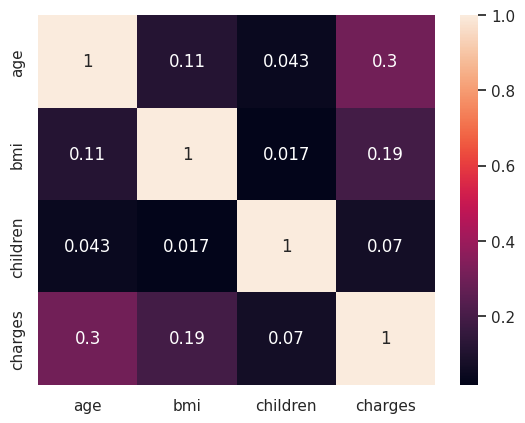

In [341]:
## Check for Correlation
corr = df.select_dtypes(include = 'number').corr()
sns.heatmap(corr,annot = True );

#### the most infeluential feature on the charges is the age

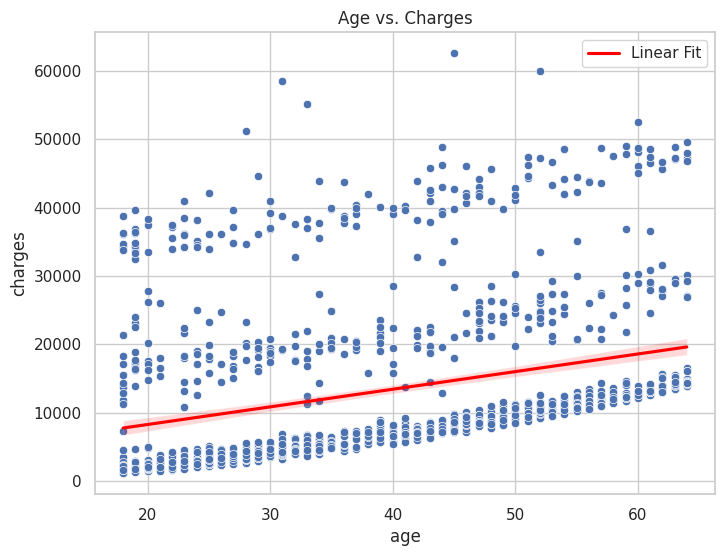

In [342]:
# is the relation between the age and the charges linear ?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges')
sns.regplot(data=df, x='age', y='charges', scatter=False, color='red', label='Linear Fit')
plt.title('Age vs. Charges')
plt.legend()
plt.show()


- The red linear regression line does not capture the data pattern well.

- You can clearly see bands or clusters of higher charges that don’t align well with the linear line.

- This strongly suggests a non-linear relationship between age and charges.

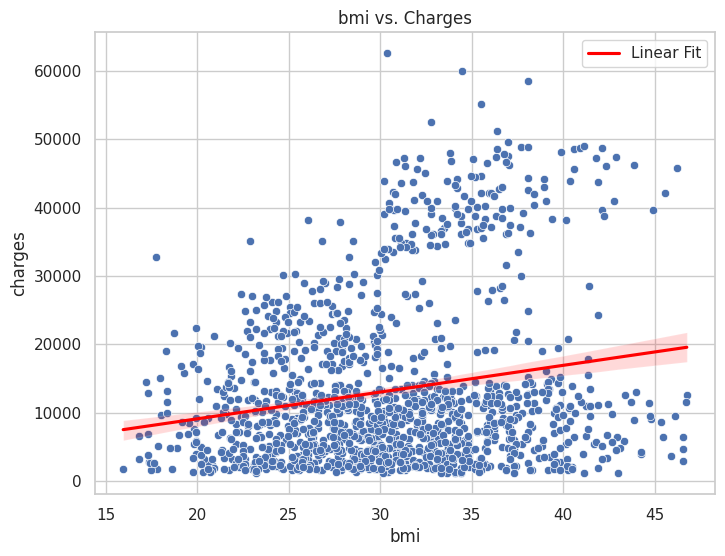

In [343]:
# is the relation between the age and the charges linear ?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges')
sns.regplot(data=df, x='bmi', y='charges', scatter=False, color='red', label='Linear Fit')
plt.title('bmi vs. Charges')
plt.legend()
plt.show()


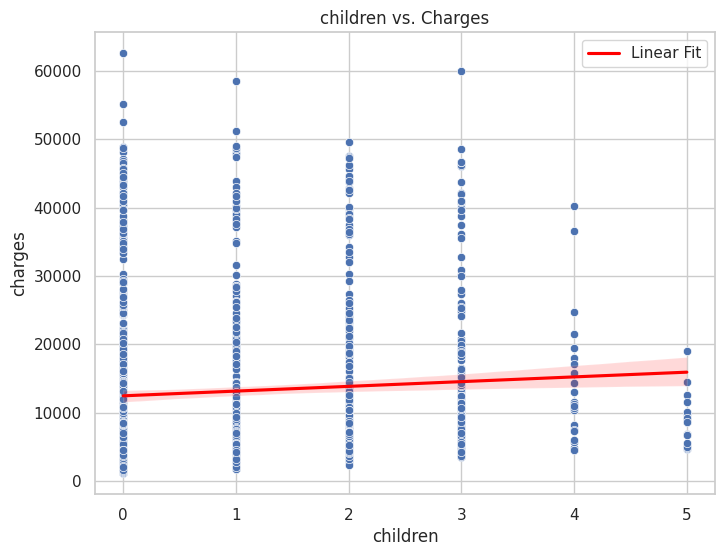

In [344]:
# is the relation between the age and the charges linear ?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='children', y='charges')
sns.regplot(data=df, x='children', y='charges', scatter=False, color='red', label='Linear Fit')
plt.title('children vs. Charges')
plt.legend()
plt.show()


In [345]:
#it's better to convert age to age groups
df.age


,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [346]:
# split the data
x = df.drop('charges',axis = 1)
y = df.charges

In [347]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,)

In [348]:
# Data encodeing
print(df.head())
# we need to encode the sex, smoker and region
print('-'*70)
print(df.region.unique())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
----------------------------------------------------------------------
['southwest' 'southeast' 'northwest' 'northeast']


### how to decide the encoder type ?

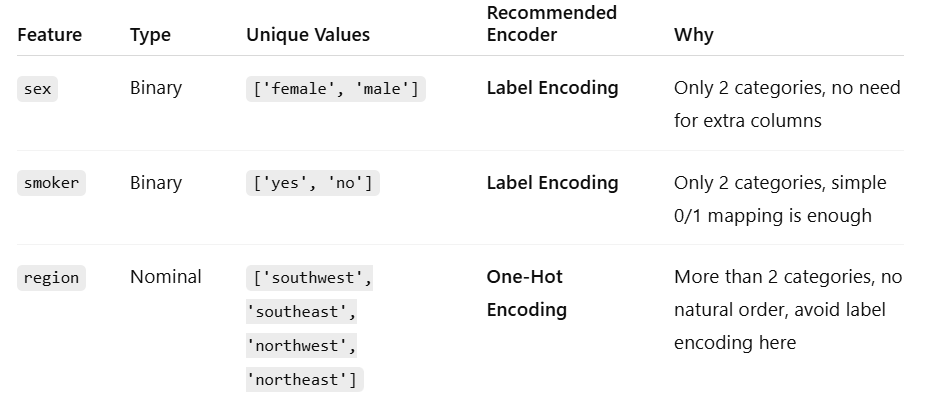

In [349]:
# applying OnehotEncoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first')
ohe.fit(x_train[['sex','region','smoker']])#fit on X_train


OneHotEncoder(drop='first')

#### Drop first parameter
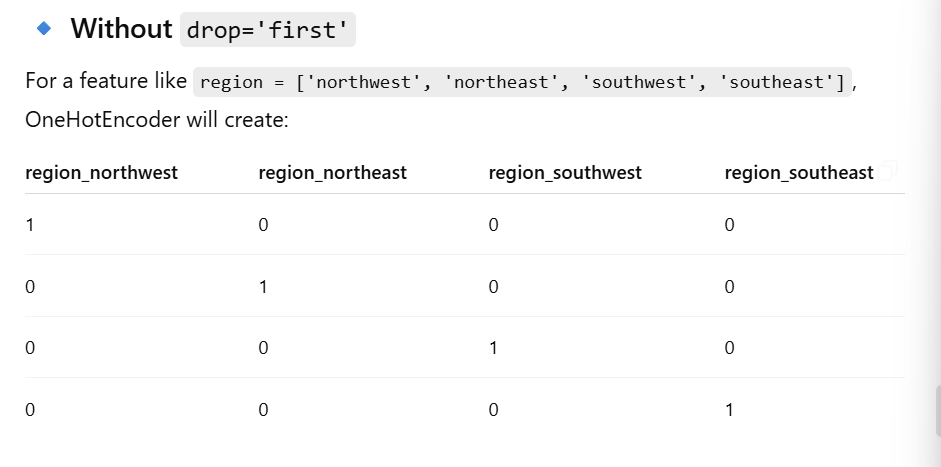

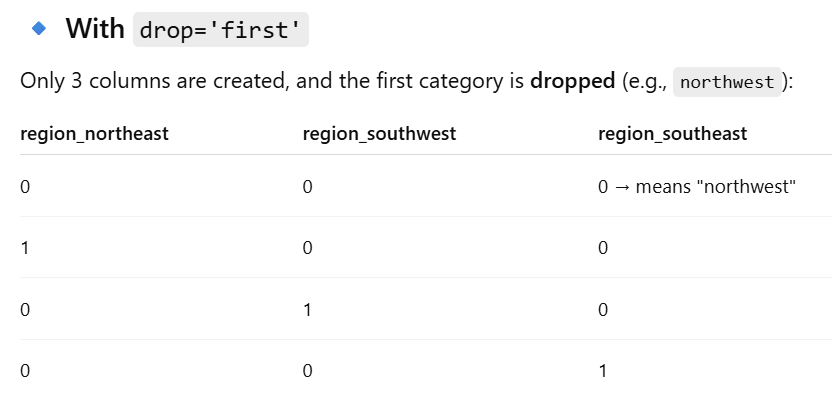

In [350]:
temp = ohe.transform(x_train[['sex','region','smoker']])
x_train.drop(['sex','region','smoker'],axis = 1,inplace = True)


In [351]:
ohe.get_feature_names_out()

array(['sex_male', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_yes'], dtype=object)

In [352]:
x_train[['sex_male', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_yes']] = temp.toarray()

In [353]:
x_train

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
835,42,35.970,2,1.0,0.0,1.0,0.0,0.0
1087,57,31.540,0,1.0,1.0,0.0,0.0,0.0
283,55,32.395,1,0.0,0.0,0.0,0.0,0.0
389,24,30.210,3,0.0,1.0,0.0,0.0,0.0
1149,42,34.100,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
809,25,25.840,1,1.0,0.0,0.0,0.0,0.0
273,50,27.455,1,1.0,0.0,0.0,0.0,0.0
350,57,23.180,0,0.0,1.0,0.0,0.0,0.0
585,33,28.270,1,0.0,0.0,1.0,0.0,0.0


In [354]:
# apply to x_test
temp = ohe.transform(x_test[['sex','region','smoker']])
x_test.drop(['sex','region','smoker'],axis = 1,inplace = True)
x_test[['sex_male', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_yes']] = temp.toarray()

In [355]:
x_test

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
200,19,32.110,0,0.0,1.0,0.0,0.0,0.0
984,20,30.115,5,1.0,0.0,0.0,0.0,0.0
53,36,34.430,0,1.0,0.0,1.0,0.0,1.0
1104,37,29.800,0,1.0,0.0,0.0,1.0,0.0
447,56,25.650,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1285,47,24.320,0,0.0,0.0,0.0,0.0,0.0
304,57,38.000,2,0.0,0.0,0.0,1.0,0.0
1230,52,34.485,3,1.0,1.0,0.0,0.0,1.0
174,24,33.345,0,0.0,1.0,0.0,0.0,0.0


In [356]:
# Normalizing the data
df
# as the columns have different scales

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [357]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(x_train,y_train)


LinearRegression()

In [358]:
from sklearn.metrics import mean_absolute_error
pred=m.predict(x_train)
mean_absolute_error(y_train,pred)

4125.655690500955

In [359]:
pred=m.predict(x_test)
mean_absolute_error(y_test,pred)

4369.283028723907

if mae of test > train --> mean overfitting

## How to enhance model performance
#### Binning for categorical data
#### Transform Target -> to convert to normal distribution
#### Normalize the features

<Axes: xlabel='charges', ylabel='Density'>

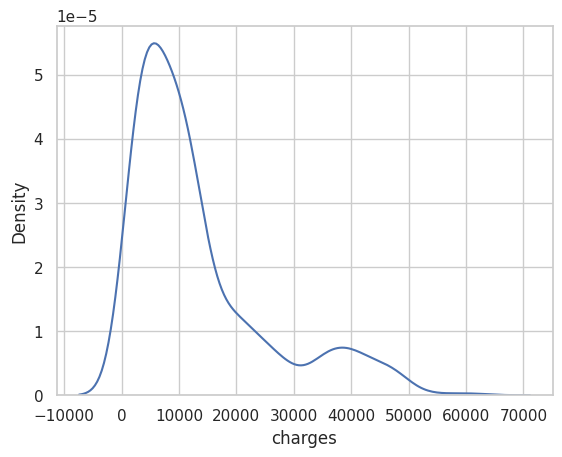

In [360]:
# KDE plot of charges
import seaborn as sns
sns.kdeplot(df.charges)
# Most statistical models (e.g., linear regression)
#assume residuals are normally distributed.
#A skewed target violates this assumption, leading to poor model performance.

In [361]:
# log transformation of charges
df.charges.describe()


,charges
count,1329.000000
mean,13212.333374
std,11997.236429
min,1121.873900
25%,4738.268200
50%,9361.326800
75%,16586.497710
max,62592.873090


Outliers and Heteroscedasticity
- The max charge $62,592  6x higher than the 75th percentile $16,586 , indicating extreme outliers.  
- Such outliers dominate the MSE metric .  

Why log-transform?
  - Log transformation **compresses large values** and reduces the influence of outliers.  
  - It stabilizes variance (heteroscedasticity), ensuring the model isn’t biased toward high-value predictions.  


In [362]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [363]:
m_log = LinearRegression()
m_log.fit(x_train,y_train_log)

LinearRegression()

In [364]:
pred = m_log.predict(x_train)
mean_absolute_error(y_train_log,pred)

0.2786265371682791

In [365]:
pred = m_log.predict(x_test)
mean_absolute_error(y_test_log,pred)

0.29370733291004925

### perform binning (discretization) using the cut method

In [366]:
# df.bmi.describe()

In [367]:
# bins = [15, 18.5, 25, 30, 47]
# labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

In [368]:
# x_train['bmi_binned'] = pd.cut(x_train['bmi'], bins=bins, labels=labels)
# x_test['bmi_binned'] = pd.cut(x_test['bmi'], bins=bins, labels=labels)

In [369]:
x_train

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
835,42,35.970,2,1.0,0.0,1.0,0.0,0.0
1087,57,31.540,0,1.0,1.0,0.0,0.0,0.0
283,55,32.395,1,0.0,0.0,0.0,0.0,0.0
389,24,30.210,3,0.0,1.0,0.0,0.0,0.0
1149,42,34.100,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
809,25,25.840,1,1.0,0.0,0.0,0.0,0.0
273,50,27.455,1,1.0,0.0,0.0,0.0,0.0
350,57,23.180,0,0.0,1.0,0.0,0.0,0.0
585,33,28.270,1,0.0,0.0,1.0,0.0,0.0


In [370]:
# df.age.describe()

In [371]:
# bins = [18, 27, 39, 51, 64]  # Edges: min (18), 25th (27), median (39), 75th (51), max (64)
# labels = ['Young Adults (18-26)', 'Adults (27-38)', 'Middle-Aged (39-50)', 'Older Adults (51-64)']

# x_train['age_group'] = pd.cut(
#     x_train['age'],
#     bins=bins,
#     labels=labels,
#     right=False  # Bins: [18,27), [27,39), [39,51), [51,64]
# )

# x_test['age_group'] = pd.cut(
#     x_test['age'],
#     bins=bins,
#     labels=labels,
#     right=False  # Bins: [18,27), [27,39), [39,51), [51,64]
# )

In [372]:
# x_test

In [373]:
# df.children.value_counts()

In [374]:
# # Apply OneHotEncoder on bmi,age,childern
# ohe = OneHotEncoder(drop = 'first')
# ohe.fit(x_train[['bmi_binned'	,'age_group','children']])#fit on X_train

In [375]:

# temp = ohe.transform(x_train[['bmi_binned'	,'age_group','children']])
# x_train.drop(['bmi_binned'	,'age_group','children'],axis = 1,inplace = True)


In [376]:
# ohe.get_feature_names_out()

In [377]:
# x_train[['bmi_binned_Obese', 'bmi_binned_Overweight',
#        'bmi_binned_Underweight', 'age_group_Middle-Aged (39-50)',
#        'age_group_Older Adults (51-64)', 'age_group_Young Adults (18-26)',
#        'age_group_nan', 'children_1', 'children_2', 'children_3',
#        'children_4', 'children_5']] = temp.toarray()

In [378]:
# # apply to x_test
# temp = ohe.transform(x_test[['bmi_binned'	,'age_group','children']])
# x_test.drop(['bmi_binned'	,'age_group','children'],axis = 1,inplace = True)

# x_test[['bmi_binned_Obese', 'bmi_binned_Overweight',
#        'bmi_binned_Underweight', 'age_group_Middle-Aged (39-50)',
#        'age_group_Older Adults (51-64)', 'age_group_Young Adults (18-26)',
#        'age_group_nan', 'children_1', 'children_2', 'children_3',
#        'children_4', 'children_5']] = temp.toarray()

In [379]:
# x_train.drop(['age','bmi'],axis = 1,inplace = True)
# x_test.drop(['age','bmi'],axis = 1,inplace = True)


In [380]:
# x_train

In [381]:
# x_test

In [382]:
# m_log_plus_bin = LinearRegression()
# m_log_plus_bin.fit(x_train,y_train_log)


In [383]:
# pred = m_log_plus_bin.predict(x_train)
# mean_absolute_error(y_train_log,pred)

In [384]:
# pred = m_log_plus_bin.predict(x_test)
# mean_absolute_error(y_test_log,pred)

###Experiment Conclusion: no effect of binning on the model training

## Saving the model using pickle


In [385]:
import pickle

In [387]:
# permesion 'wb' write binary
# saving the linear regression model with the log transform
with open ("lr.pkl",'wb') as f:
  pickle.dump(m_log,f)



In [388]:
# saving the encoder
with open("ohe.pkl",'wb') as f :
  pickle.dump(ohe,f)

In [389]:
# predicting
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [390]:
df.region.value_counts()

,count
region,
southeast,357
northwest,325
southwest,324
northeast,323


In [393]:
x_train

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
835,42,35.970,2,1.0,0.0,1.0,0.0,0.0
1087,57,31.540,0,1.0,1.0,0.0,0.0,0.0
283,55,32.395,1,0.0,0.0,0.0,0.0,0.0
389,24,30.210,3,0.0,1.0,0.0,0.0,0.0
1149,42,34.100,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
809,25,25.840,1,1.0,0.0,0.0,0.0,0.0
273,50,27.455,1,1.0,0.0,0.0,0.0,0.0
350,57,23.180,0,0.0,1.0,0.0,0.0,0.0
585,33,28.270,1,0.0,0.0,1.0,0.0,0.0


In [394]:
# i have to stick to the arrangement of the x_train features
m_log.predict([[42,	35.970,	2	,1.0,	0.0,	1.0,	0.0,	0.0]])

array([8.95802025])

In [395]:
# the output is log scaled
# i need to inverse the scalling to get the exact value
np.exp(8.95802025)

np.float64(7769.959647684431)

##### extract requirement file from our environment

In [396]:
! pip freeze > requirements.txt